<a href="https://colab.research.google.com/github/KVinayReddy7/21BDS0287-EDA/blob/main/Module7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODULE 7(Model Development and Evaluation)**

**KATUKURI VINAY REDDY**

**21BDS0287**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Loading the dataset from the new GitHub link
url = 'https://github.com/KVinayReddy7/21BDS0287-EDA/blob/main/credit%20card.csv?raw=true'
df = pd.read_csv(url)

df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**Data Cleaning and Preprocessing**

In [11]:
# Fill missing values for numeric columns
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing values for categorical columns (if any)
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop unnecessary columns (if any)
if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True)  # Dropping 'ID' as it is just a unique identifier

<ipython-input-11-477b708c2b94>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


**Relationships Between Features**

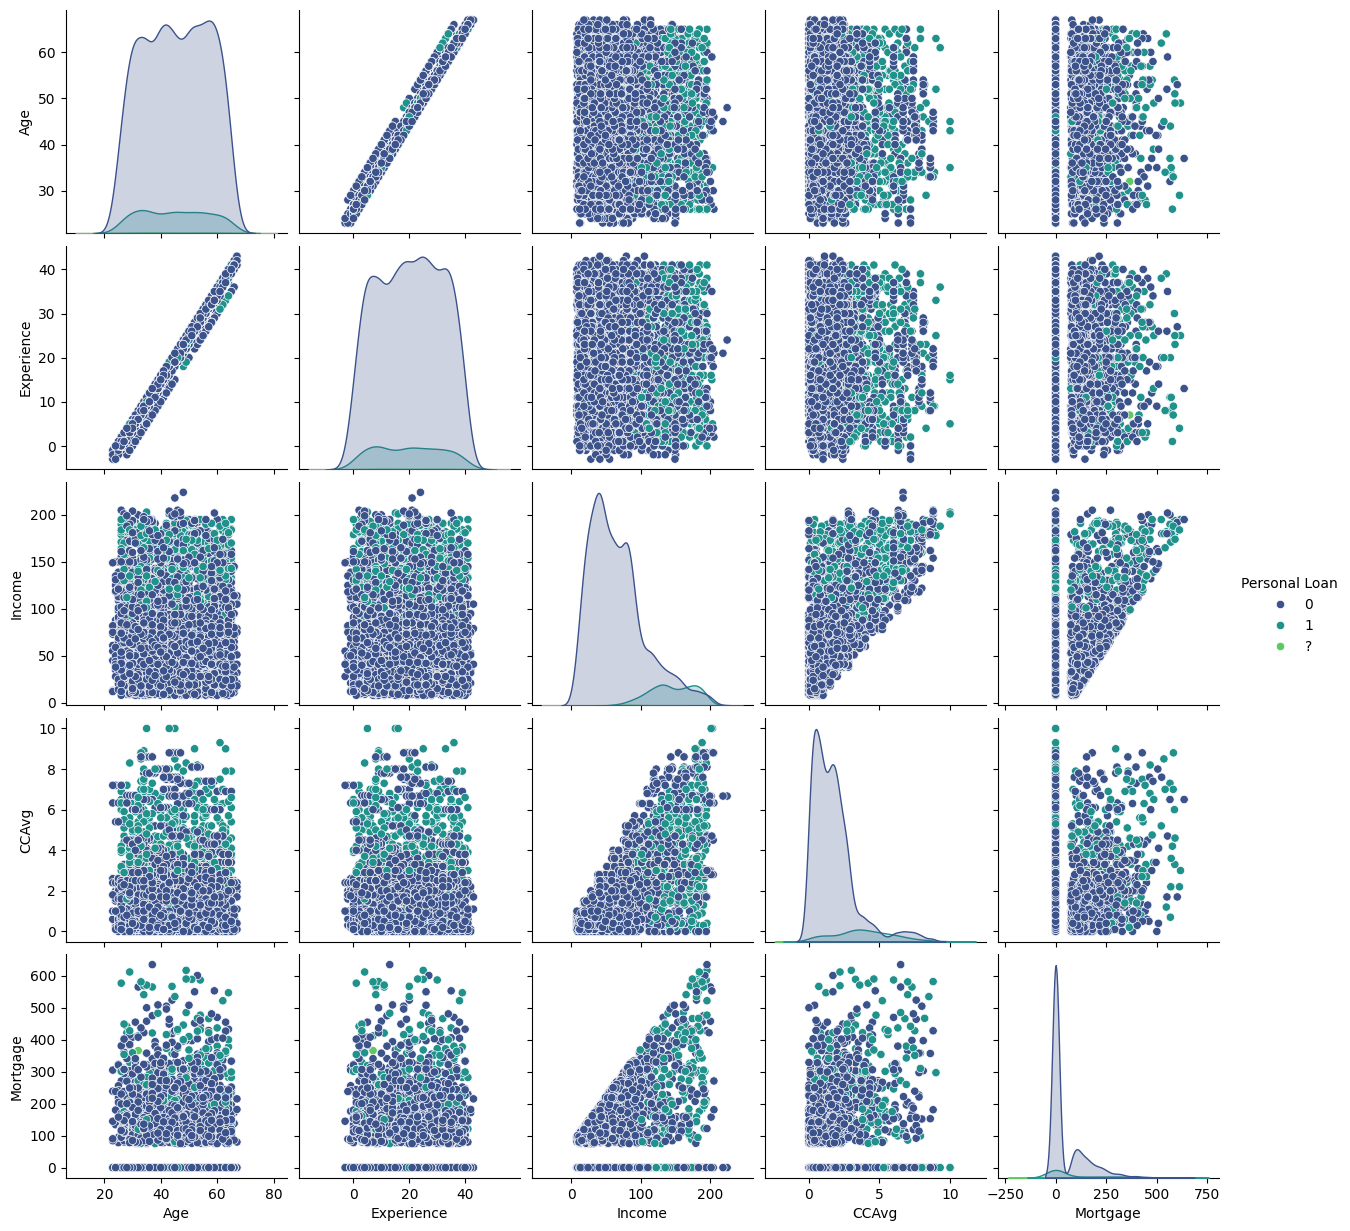

In [3]:
# Convert 'Personal Loan' to a string type to ensure correct categorical handling
df['Personal Loan'] = df['Personal Loan'].astype(str)

# Selecting relevant numerical columns
selected_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

# Pair plot to identify relationships
sns.pairplot(df[selected_features + ['Personal Loan']], hue='Personal Loan', palette="viridis")
plt.show()

**Split the Dataset into Training and Test Sets**

In [4]:
from sklearn.model_selection import train_test_split

# Independent (X) and Dependent (y) Variables
X = df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]
y = df['Personal Loan']  # Target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

**Simple Linear Regression**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Convert 'Income' and 'Personal Loan' to numeric, setting errors='coerce' to handle non-numeric values
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
df['Personal Loan'] = pd.to_numeric(df['Personal Loan'], errors='coerce')

# Drop rows with missing values
df_cleaned = df.dropna(subset=['Income', 'Personal Loan'])

# Define Independent and Dependent variables
X = df_cleaned[['Income']]       # Independent variable
y = df_cleaned['Personal Loan']  # Dependent variable

# Split dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the Linear Regression model
reg1 = LinearRegression()
reg1.fit(X_train, y_train)

LinearRegression()

In [6]:
# Print coefficients and intercept
print(f"Coefficient: {reg1.coef_[0]}")
print(f"Intercept: {reg1.intercept_}")

Coefficient: 0.003172495811687944
Intercept: -0.14110050636519925


**Predict Test Results**

In [7]:
# Predict Test Results
y_pred = reg1.predict(X_test[['Income']])  # Using 'Income' as the predictor

**Visualize Results**

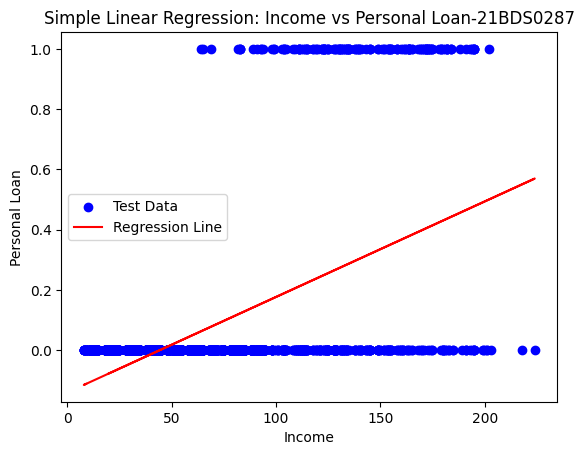

In [8]:
# Scatter plot with regression line
plt.scatter(X_test[['Income']], y_test, color='blue', label='Test Data')  # Actual values
plt.plot(X_test[['Income']], y_pred, color='red', label='Regression Line')  # Predicted values

# Labels and title
plt.xlabel("Income")
plt.ylabel("Personal Loan")
plt.title("Simple Linear Regression: Income vs Personal Loan-21BDS0287")
plt.legend()

# Show plot
plt.show()

**Multiple Linear Regression**

In [13]:
# Apply log transformation to 'Income' (to normalize skewed data)
df['log_Income'] = np.log(df['Income'] + 1)  # Adding 1 to avoid log(0) issues

# Independent variables and dependent variable
X_multi = df[['Age', 'CCAvg', 'Mortgage', 'log_Income']]  # Selecting meaningful predictors
y_multi = df['Personal Loan']  # Target variable

# Split dataset
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=1/3, random_state=42)

# Fit model
reg2 = LinearRegression()
reg2.fit(X_train_multi, y_train_multi)

LinearRegression()

**Residuals and Prediction**

In [16]:
# Generate predictions first
y_pred_multi = reg2.predict(X_test_multi)  # Ensure `reg2` is already trained

# Convert y_test_multi and y_pred_multi to numeric
y_test_multi = pd.to_numeric(y_test_multi, errors='coerce')
y_pred_multi = pd.to_numeric(y_pred_multi, errors='coerce')

# Compute residuals
residuals = y_test_multi - y_pred_multi
print("Residuals:\n", residuals)

Residuals:
 1501    0.041353
2586    0.685175
2653   -0.290094
1055   -0.046093
705     0.031050
          ...   
1705   -0.094410
1873   -0.067402
2550    0.071247
2086   -0.076911
2197    0.030498
Name: Personal Loan, Length: 1667, dtype: float64


**DataFrame for Predicted and Residuals**

In [17]:
# Convert predictions and residuals to numeric (if necessary)
y_pred_multi = pd.to_numeric(y_pred_multi, errors='coerce')
residuals = pd.to_numeric(residuals, errors='coerce')

# Create DataFrame for Predicted and Residuals
pred_residuals = pd.DataFrame({
    'Predicted': y_pred_multi,
    'Residuals': residuals
})

# Display the first few rows
print(pred_residuals.head())

      Predicted  Residuals
1501  -0.041353   0.041353
2586   0.314825   0.685175
2653   0.290094  -0.290094
1055   0.046093  -0.046093
705   -0.031050   0.031050


**Visualize with ggplot or qqPlot**

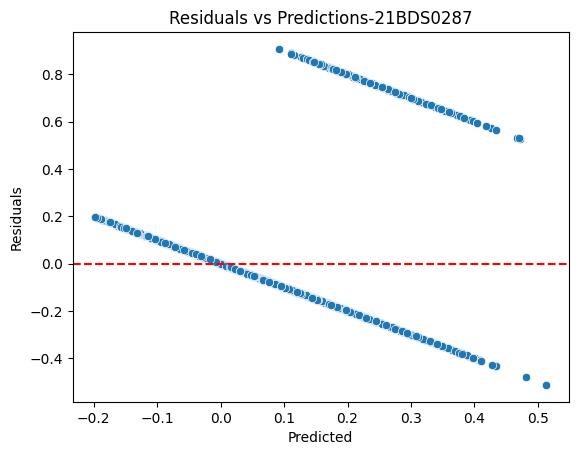

In [18]:
# Ensure numeric values in DataFrame
pred_residuals = pred_residuals.dropna()  # Remove NaNs if any

# Scatter plot of residuals vs. predicted values
sns.scatterplot(x=pred_residuals['Predicted'], y=pred_residuals['Residuals'])
plt.axhline(0, color='red', linestyle='--')  # Reference line at 0
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions-21BDS0287")
plt.show()

**QQ Plot**

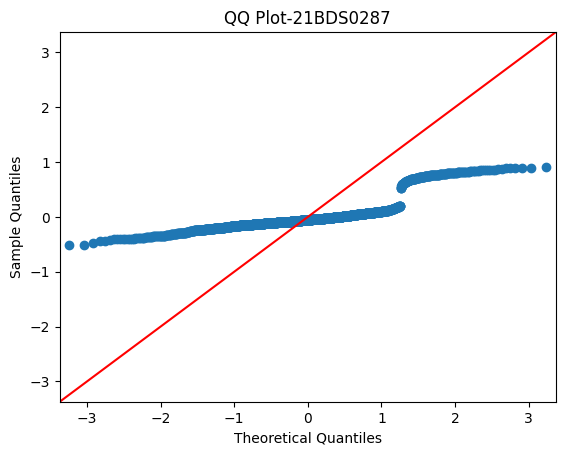

In [19]:
# Ensure residuals are numeric and drop NaN values
residuals = pd.to_numeric(residuals, errors='coerce').dropna()

# QQ Plot
sm.qqplot(residuals, line='45')
plt.title("QQ Plot-21BDS0287")
plt.show()

**Logistic Regression Implementation**

In [20]:
#import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

**Preparing the data**

In [21]:
# Assign X and y
X = df[['CCAvg']]  # Independent variable (e.g., average credit card spending per month)
y = df['Personal Loan']  # Dependent variable (binary classification: 1 = Yes, 0 = No)

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Fit Logistic Regression to the training set**

In [22]:
# Create logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

**Predicting the test results**

In [23]:
# Predicting the Test set results
y_pred = log_reg.predict(X_test)

**Model Evaluation**

In [24]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Confusion Matrix:
 [[1320   23]
 [ 146   11]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      1343
         1.0       0.32      0.07      0.12       157

    accuracy                           0.89      1500
   macro avg       0.61      0.53      0.53      1500
weighted avg       0.84      0.89      0.85      1500



**Visualize the Logistic Regression**

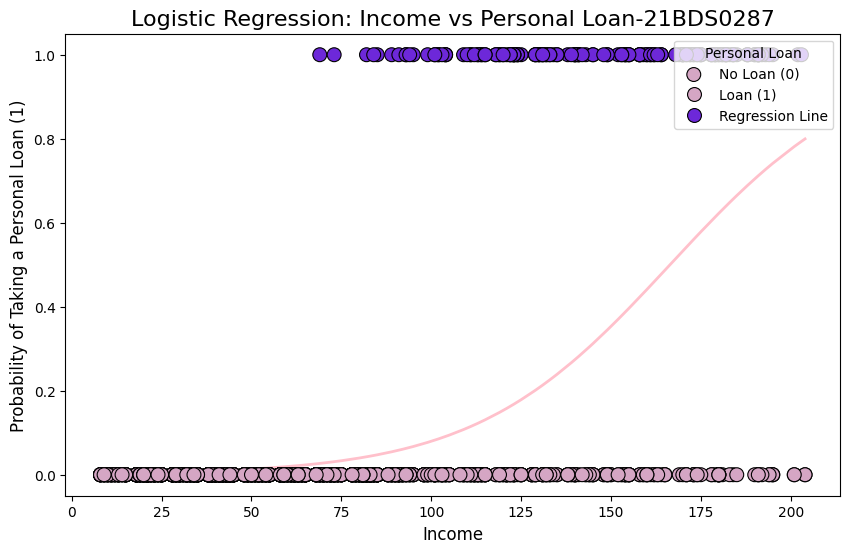

In [25]:
# Independent variable (e.g., Income)
X = df[['Income']]
# Dependent variable (Target: Personal Loan)
y = df['Personal Loan']

# Splitting the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression Model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# Scatter plot of actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Income'], y=y_test, hue=y_test, palette=["#D5A6C4", "#6D28D9"], s=100, edgecolor="black", zorder=2)

# Get predicted probabilities for class 1 (Personal Loan = 1)
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Sort values for smooth curve plotting
sorted_indices = np.argsort(X_test['Income'])
sorted_X_test = X_test.iloc[sorted_indices]
sorted_probabilities = predicted_probabilities[sorted_indices]

# Plot logistic regression curve
plt.plot(sorted_X_test['Income'], sorted_probabilities, color='pink', linewidth=2, zorder=1)

# Title and labels
plt.title('Logistic Regression: Income vs Personal Loan-21BDS0287', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Probability of Taking a Personal Loan (1)', fontsize=12)

# Custom Legend
plt.legend(title="Personal Loan", labels=['No Loan (0)', 'Loan (1)', 'Regression Line'], loc='upper right')

# Show the plot
plt.show()